- In this notebook, we do vesicle detection on microscopy images
- Then construct the data set for modeling

In [ ]:
# Add the src directory to sys.path
import sys
sys.path.append(os.path.abspath('../src'))

In [1]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np

from utils import *
from batch_run import run_batch_files_templates
import argparse
import pandas as pd
import time
import shutil
import re
import seaborn as sns

In [2]:
template1 = np.load('../Templates/template_656, 640, 71, 71.npy')
template2 = np.load('../Templates/Project_Whole Plate1_1024x1024_200Hz_1%Laser_800gain_B_5_R1.tif_enhance_482_20_56_56.npy')
template3 = np.load('../Templates/1024x1024 - 4 point_no-z-stack - split 5 rows rows only_TileScan 1_C_11_R2.npy')

In [3]:
templates = [template1, template2, template3]

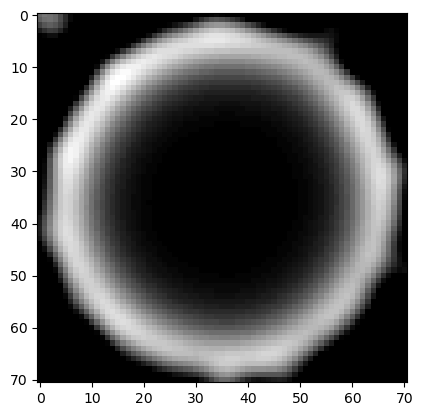

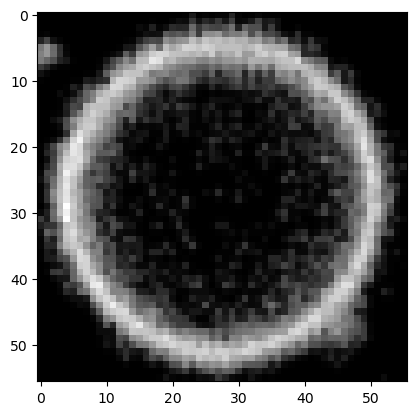

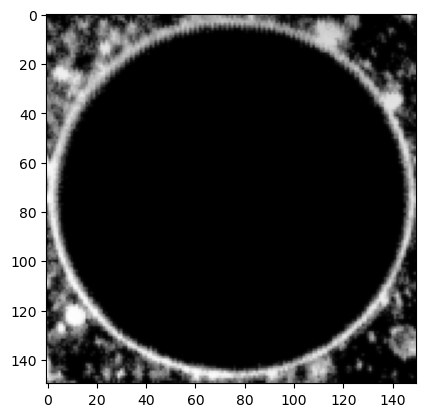

In [4]:
for template in templates:
    plt.imshow(template, cmap='gray')
    plt.show()

In [13]:
file_folder= './../data/20240701/OriginalImage/20240712_132942_764'
PlateName='Plate_20240712'
# Create the folder if it doesn't exist
folder_path = f"Results_{PlateName}"
os.makedirs(folder_path, exist_ok=True)
# Record the start time
import time
start_time = time.time()
# file_template = load_template(template)
run_batch_files_templates(file_folder, templates, PlateName, \
                min_scale=0.3, max_scale=4, intervals=100, threshold = 0.5, Preprocess=False)

# Record the end time
end_time = time.time()

# Calculate the running time
running_time = end_time - start_time

print("Script execution time:", running_time, "seconds")

None vesicles found
WellK08_PointK08_0002_ChannelNile Red_Seq0662.ome.tiff
None vesicles found
WellH04_PointH04_0003_ChannelNile Red_Seq0475.ome.tiff
1 vesicles found
WellJ07_PointJ07_0001_ChannelNile Red_Seq0621.ome.tiff
2 vesicles found
WellJ13_PointJ13_0000_ChannelNile Red_Seq0596.ome.tiff
None vesicles found
WellF10_PointF10_0003_ChannelNile Red_Seq0291.ome.tiff
94 vesicles found
WellD15_PointD15_0003_ChannelNile Red_Seq0111.ome.tiff
None vesicles found
WellE17_PointE17_0002_ChannelNile Red_Seq0218.ome.tiff
None vesicles found
WellH09_PointH09_0000_ChannelNile Red_Seq0452.ome.tiff
None vesicles found
WellE14_PointE14_0002_ChannelNile Red_Seq0206.ome.tiff
None vesicles found
WellC08_PointC08_0001_ChannelNile Red_Seq0021.ome.tiff
None vesicles found
WellC21_PointC21_0003_ChannelNile Red_Seq0075.ome.tiff
123 vesicles found
WellI20_PointI20_0003_ChannelNile Red_Seq0551.ome.tiff
None vesicles found
WellD13_PointD13_0001_ChannelNile Red_Seq0117.ome.tiff
None vesicles found
WellC21_PointC

### Data construction

In [14]:
df = pd.read_csv('../../data/20240701/VesicleDetection/Results_Plate_20240712/Plate_20240712_VesiclesSummary.csv')
df

,filename,num_vesicles,area_vesicles,area_percent
0,WellK08_PointK08_0002_ChannelNile Red_Seq0662....,0,0.000000,0.000000
1,WellH04_PointH04_0003_ChannelNile Red_Seq0475....,0,0.000000,0.000000
2,WellJ07_PointJ07_0001_ChannelNile Red_Seq0621....,1,452.389342,0.000431
3,WellJ13_PointJ13_0000_ChannelNile Red_Seq0596....,2,1150.608309,0.001097
4,WellF10_PointF10_0003_ChannelNile Red_Seq0291....,0,0.000000,0.000000
...,...,...,...,...
771,WellL17_PointL17_0002_ChannelNile Red_Seq0742....,147,106217.247618,0.101297
772,WellJ08_PointJ08_0000_ChannelNile Red_Seq0616....,1,572.555261,0.000546
773,WellE09_PointE09_0003_ChannelNile Red_Seq0187....,132,81577.736436,0.077799
774,WellE15_PointE15_0000_ChannelNile Red_Seq0208....,0,0.000000,0.000000


In [21]:
df_sorted = df.sort_values(by='filename')

# Extract the part before the first '_' in 'filename'
df_sorted['group'] = df_sorted['filename'].str.split('_').str[0]

# Group by 'group', take median of other columns, and keep the first row
df_final = df_sorted.groupby('group').agg({
    'filename': 'first',
    'num_vesicles': 'median',
    'area_vesicles': 'median',
    'area_percent': 'median'
}).reset_index(drop=True)

# Round num_vesicles to integer
df_final['num_vesicles'] = df_final['num_vesicles'].round().astype(int)
# By default, round() uses "round half to even" (also known as "bankers' rounding") 
# Extracting positions from filename column
df_final['position'] = df_final['filename'].str.extract(r'Well([A-Z]+\d+)_')

# Dropping the original filename column
df_final = df_final[['position', 'num_vesicles', 'area_vesicles', 'area_percent']]
df_final

,position,num_vesicles,area_vesicles,area_percent
0,C03,0,0.000000,0.000000
1,C04,0,0.000000,0.000000
2,C05,0,0.000000,0.000000
3,C06,0,0.000000,0.000000
4,C07,0,0.000000,0.000000
...,...,...,...,...
189,L18,0,0.000000,0.000000
190,L19,86,34030.909721,0.032454
191,L20,0,0.000000,0.000000
192,L21,0,0.000000,0.000000


In [18]:
df_filtered = df_final[df_final['position'].isin(['L09', 'L10'])]
df_filtered

,position,num_vesicles,area_vesicles,area_percent
180,L09,0,0.0,0.0
181,L10,0,0.0,0.0


In [22]:
# Filter out the rows where 'position' is 'L9' or 'L10', these 2 positions are empty wells
df_final = df_final[~df_final['position'].isin(['L09', 'L10'])]
df_final

,position,num_vesicles,area_vesicles,area_percent
0,C03,0,0.000000,0.000000
1,C04,0,0.000000,0.000000
2,C05,0,0.000000,0.000000
3,C06,0,0.000000,0.000000
4,C07,0,0.000000,0.000000
...,...,...,...,...
189,L18,0,0.000000,0.000000
190,L19,86,34030.909721,0.032454
191,L20,0,0.000000,0.000000
192,L21,0,0.000000,0.000000


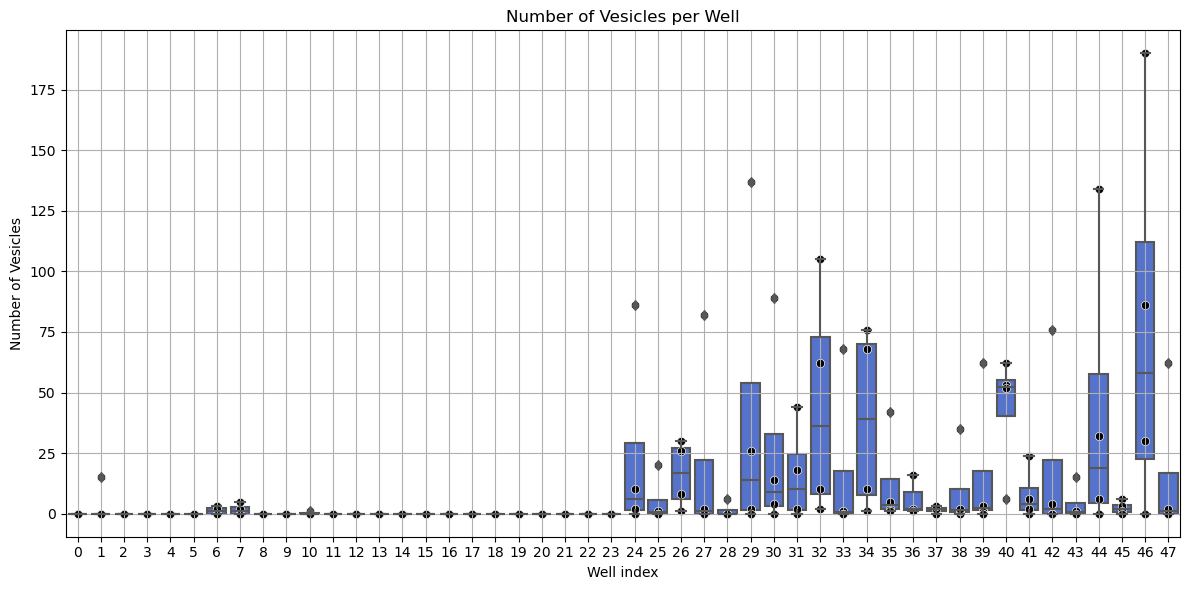

In [23]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=df_final.index % 48, y='num_vesicles', data=df_final, color='royalblue')

# Scatter plot without NaN values
sns.scatterplot(x=df_final.index % 48, y='num_vesicles', data=df_final.dropna(), color='black', ax=ax)

# Set labels and title
ax.set_xlabel('Well index')
ax.set_ylabel('Number of Vesicles')
ax.set_title('Number of Vesicles per Well')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
num_rows_per_df = 48
numeric_df = df_final.select_dtypes(include=np.number)

# Calculate the median values along the rows
median_values = numeric_df.groupby(numeric_df.index % num_rows_per_df).median()

# Print the median values
median_values

,num_vesicles,area_vesicles,area_percent
0,0.0,0.000000,0.000000
1,0.0,0.000000,0.000000
2,0.0,0.000000,0.000000
3,0.0,0.000000,0.000000
4,0.0,0.000000,0.000000
5,0.0,0.000000,0.000000
6,1.0,487.732259,0.000465
7,1.0,1251.139274,0.001193
8,0.0,0.000000,0.000000
9,0.0,0.000000,0.000000


In [25]:
dispense_df = pd.read_csv('dispense_df_GPC_20240701.csv')
dispense_df

,decanoic acid_Concentration (50 mM),decanoic acid_Concentration (10 mM),decanoic acid_Concentration (2 mM),decanoate_Concentration (50 mM),decanoate_Concentration (10 mM),decanoate_Concentration (2 mM),decylamine_Concentration (50 mM),decylamine_Concentration (10 mM),decylamine_Concentration (2 mM),decyl trimethylamine_Concentration (50 mM),decyl trimethylamine_Concentration (10 mM),decyl trimethylamine_Concentration (2 mM),decylsulfate_Concentration (50 mM),decylsulfate_Concentration (10 mM),decylsulfate_Concentration (2 mM),decanol_Concentration (15 mM),decanol_Concentration (3 mM),monocaprin_Concentration (10 mM),monocaprin_Concentration (2 mM)
0,0.0,8.8,0.0,0.0,10.1,0.0,0.0,9.8,0.0,0.0,5.6,0.0,0.0,0.0,7.9,4.4,0.0,17.0,0.0
1,0.0,7.7,0.0,0.0,8.9,0.0,0.0,10.6,0.0,0.0,4.6,0.0,0.0,0.0,9.9,5.5,0.0,16.2,0.0
2,0.0,7.2,0.0,0.0,9.9,0.0,0.0,10.7,0.0,0.0,4.3,0.0,0.0,0.0,9.1,5.5,0.0,17.3,0.0
3,0.0,7.0,0.0,0.0,9.8,0.0,0.0,11.0,0.0,0.0,5.1,0.0,0.0,0.0,5.3,5.1,0.0,17.0,0.0
4,0.0,7.2,0.0,0.0,9.9,0.0,0.0,10.1,0.0,0.0,5.0,0.0,0.0,0.0,11.1,6.1,0.0,15.4,0.0
5,0.0,6.2,0.0,0.0,9.5,0.0,0.0,10.8,0.0,0.0,6.1,0.0,0.0,0.0,7.3,5.0,0.0,18.0,0.0
6,0.0,7.0,0.0,0.0,8.2,0.0,0.0,12.5,0.0,0.0,5.9,0.0,0.0,0.0,9.5,4.8,0.0,17.2,0.0
7,0.0,6.9,0.0,0.0,10.2,0.0,0.0,9.9,0.0,0.0,4.3,0.0,0.0,0.0,12.1,4.5,0.0,18.2,0.0
8,0.0,7.0,0.0,0.0,9.8,0.0,0.0,13.0,0.0,0.0,4.7,0.0,0.0,0.0,9.5,5.1,0.0,15.9,0.0
9,0.0,7.6,0.0,0.0,9.8,0.0,0.0,11.9,0.0,0.0,5.5,0.0,0.0,0.0,8.1,5.2,0.0,14.6,0.0


In [26]:
# List of solutes you want to extract
solutes = ['decanoic acid', 'decanoate', 'decylamine', 'decyl trimethylamine', 'decylsulfate', 'decanol', 'monocaprin']

# Create a new DataFrame to store the results
result_df = pd.DataFrame()

for solute in solutes:
    solute_columns = [col for col in dispense_df.columns if solute in col]
    concentrations = [float(re.search(r'\d+', col).group()) for col in solute_columns]
    total_con_column = solute + '_Concentration (mM)'
    result_df[total_con_column] = (dispense_df[solute_columns] * concentrations).sum(axis=1)

# Display the new DataFrame with the added columns
result_df = result_df.div(200)
result_df

,decanoic acid_Concentration (mM),decanoate_Concentration (mM),decylamine_Concentration (mM),decyl trimethylamine_Concentration (mM),decylsulfate_Concentration (mM),decanol_Concentration (mM),monocaprin_Concentration (mM)
0,0.440,0.505,0.490,0.280,0.079,0.3300,0.850
1,0.385,0.445,0.530,0.230,0.099,0.4125,0.810
2,0.360,0.495,0.535,0.215,0.091,0.4125,0.865
3,0.350,0.490,0.550,0.255,0.053,0.3825,0.850
4,0.360,0.495,0.505,0.250,0.111,0.4575,0.770
5,0.310,0.475,0.540,0.305,0.073,0.3750,0.900
6,0.350,0.410,0.625,0.295,0.095,0.3600,0.860
7,0.345,0.510,0.495,0.215,0.121,0.3375,0.910
8,0.350,0.490,0.650,0.235,0.095,0.3825,0.795
9,0.380,0.490,0.595,0.275,0.081,0.3900,0.730


In [27]:
df_combine = pd.concat([result_df, median_values], axis=1)
df_combine

,decanoic acid_Concentration (mM),decanoate_Concentration (mM),decylamine_Concentration (mM),decyl trimethylamine_Concentration (mM),decylsulfate_Concentration (mM),decanol_Concentration (mM),monocaprin_Concentration (mM),num_vesicles,area_vesicles,area_percent
0,0.440,0.505,0.490,0.280,0.079,0.3300,0.850,0.0,0.000000,0.000000
1,0.385,0.445,0.530,0.230,0.099,0.4125,0.810,0.0,0.000000,0.000000
2,0.360,0.495,0.535,0.215,0.091,0.4125,0.865,0.0,0.000000,0.000000
3,0.350,0.490,0.550,0.255,0.053,0.3825,0.850,0.0,0.000000,0.000000
4,0.360,0.495,0.505,0.250,0.111,0.4575,0.770,0.0,0.000000,0.000000
5,0.310,0.475,0.540,0.305,0.073,0.3750,0.900,0.0,0.000000,0.000000
6,0.350,0.410,0.625,0.295,0.095,0.3600,0.860,1.0,487.732259,0.000465
7,0.345,0.510,0.495,0.215,0.121,0.3375,0.910,1.0,1251.139274,0.001193
8,0.350,0.490,0.650,0.235,0.095,0.3825,0.795,0.0,0.000000,0.000000
9,0.380,0.490,0.595,0.275,0.081,0.3900,0.730,0.0,0.000000,0.000000


In [28]:
df_combine.to_csv('df_combine_20240713.csv', index=False)